In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from pansharpen_utils import brovy, ihs, gram_schmidt_pan, pansharp_pipeline
from utils import load_psf

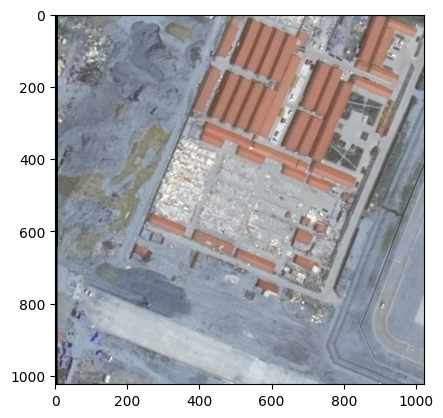

In [2]:
path_to_sample_image = "./sample_images/P0000_0000.png"
img = cv2.imread(path_to_sample_image)
plt.imshow(img)
plt.show()

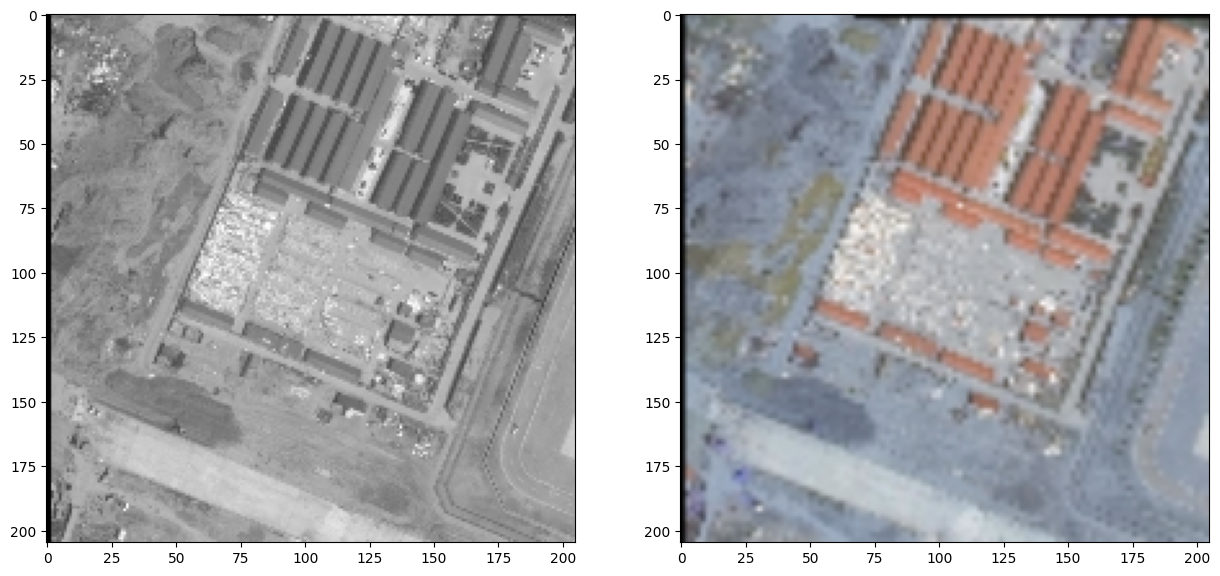

In [4]:
pan_img = cv2.cvtColor(img[::5, ::5, ::], cv2.COLOR_BGR2GRAY)
rgb_img = cv2.resize(img[::10, ::10, ::], (pan_img.shape))

plt.figure(figsize=(15, 15))

plt.subplot(1, 2, 1)
plt.imshow(pan_img, cmap="gray")

plt.subplot(1, 2, 2)
plt.imshow(rgb_img)

plt.show()

/Users/mbp/Desktop/Faks/INSA/INSA project/code/pansharpen_utils.py:18: RuntimeWarning: invalid value encountered in divide
  dnf = pan_img / np.sum(rgb_img * weights, axis=2)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


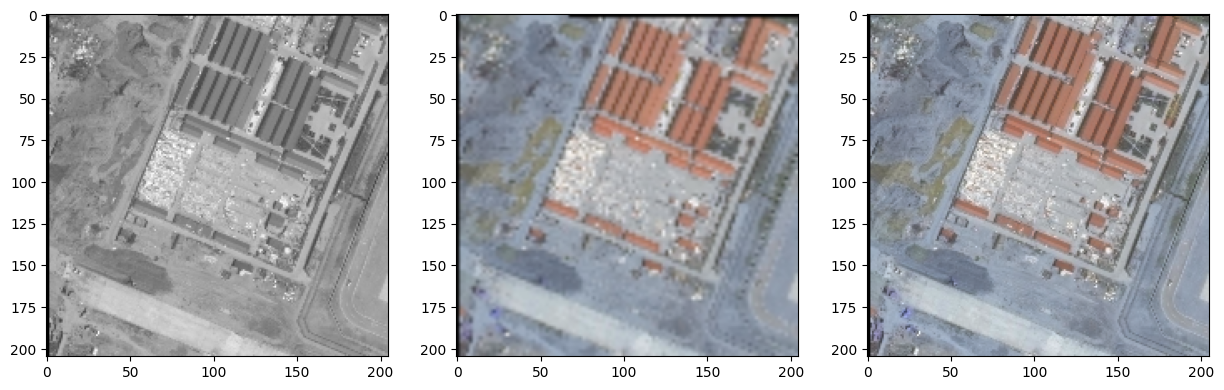

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


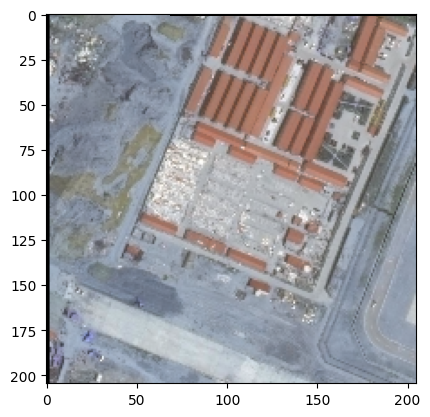

In [5]:
brovy_sharp_img = brovy(pan_img=pan_img, rgb_img=rgb_img)

plt.figure(figsize=(15, 15))

plt.subplot(1, 3, 1)
plt.imshow(pan_img, cmap="gray")

plt.subplot(1, 3, 2)
plt.imshow(rgb_img)

plt.subplot(1, 3, 3)
plt.imshow(brovy_sharp_img / 255)

plt.show()

plt.imshow(brovy_sharp_img / 255)
plt.show()

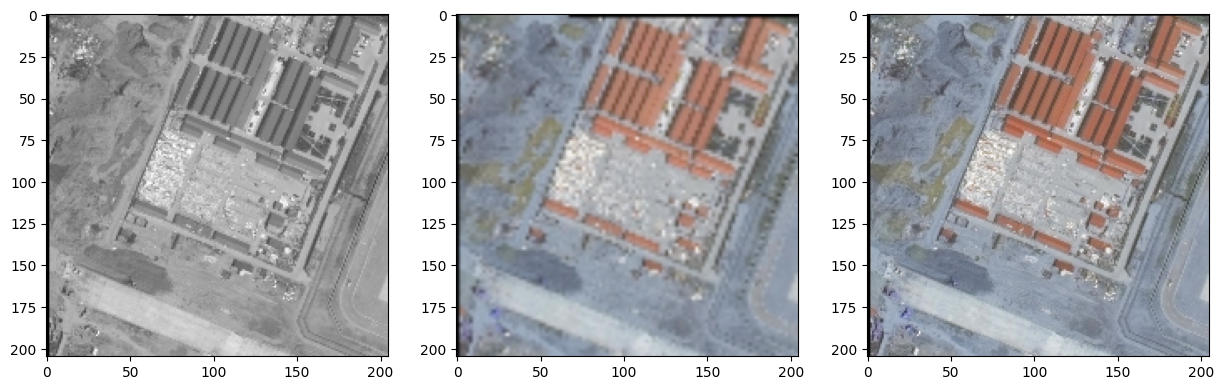

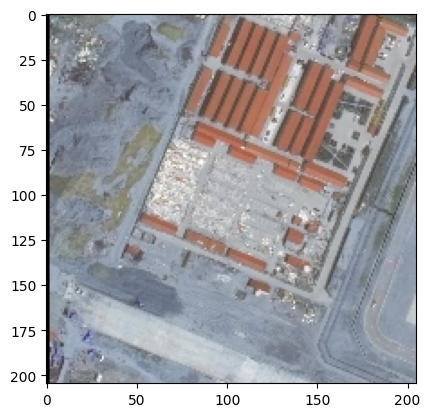

In [6]:
ihs_sharp_img = ihs(pan_img=pan_img, rgb_img=rgb_img)
plt.figure(figsize=(15, 15))

plt.subplot(1, 3, 1)
plt.imshow(pan_img, cmap="gray")

plt.subplot(1, 3, 2)
plt.imshow(rgb_img)

plt.subplot(1, 3, 3)
plt.imshow(ihs_sharp_img / 255)

plt.show()

plt.imshow(ihs_sharp_img / 255)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


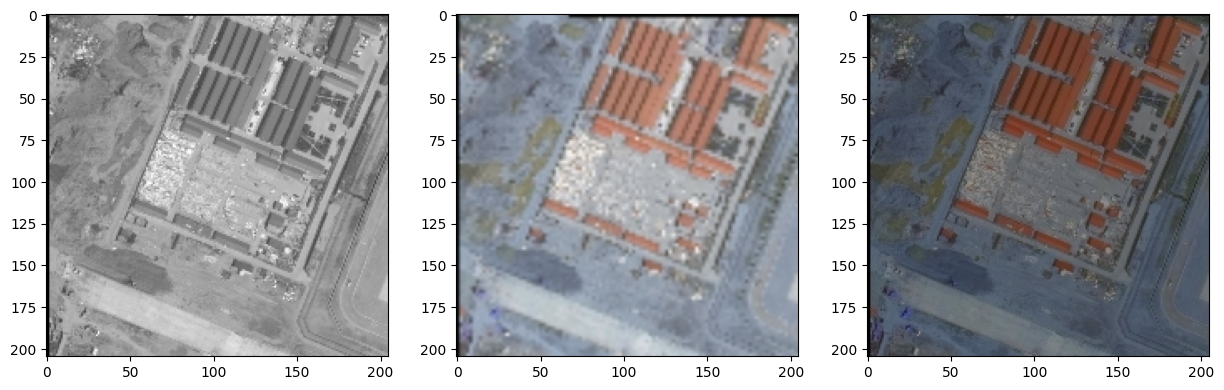

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


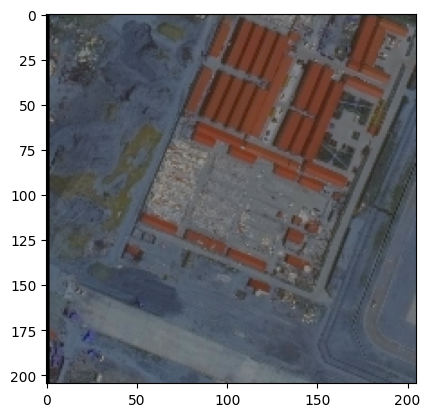

In [7]:
gram_sharp_img = gram_schmidt_pan(pan_img=pan_img, rgb_img=rgb_img, weights=[0.33, 0.33, 0.33])
plt.figure(figsize=(15, 15))

plt.subplot(1, 3, 1)
plt.imshow(pan_img, cmap="gray")

plt.subplot(1, 3, 2)
plt.imshow(rgb_img)

plt.subplot(1, 3, 3)
plt.imshow(gram_sharp_img / 255)

plt.show()

plt.imshow(gram_sharp_img / 255)
plt.show()

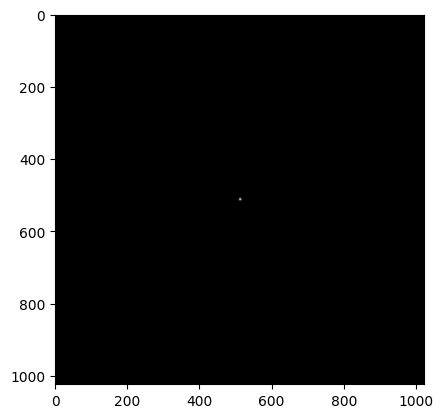

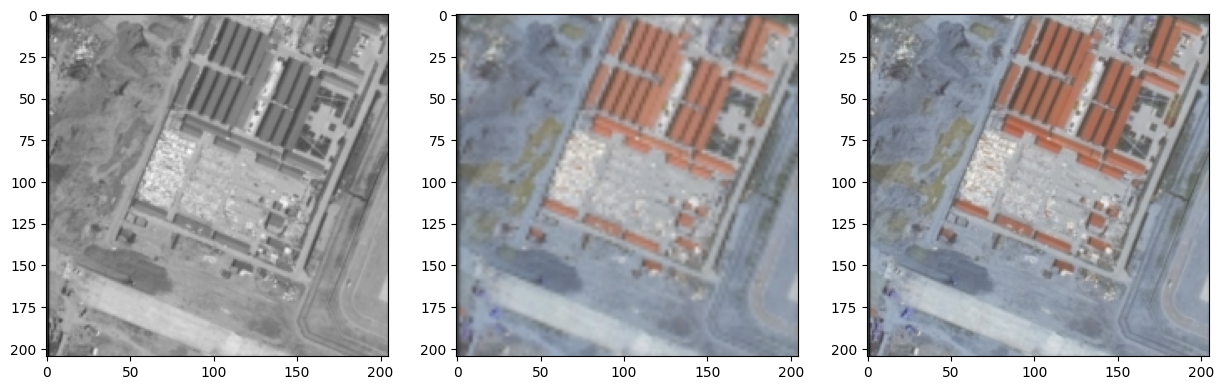

In [9]:
psf_path = "../psf"
psf = load_psf(psf_path, sigma_x=5, sigma_y=5, eta=0)
plt.imshow(psf, cmap="gray")
plt.show()

pan_img, rgb_img, sharp_img = pansharp_pipeline(img=img, psf=psf, downsampling_factor=5, algorithm=ihs)

plt.figure(figsize=(15, 15))

plt.subplot(1, 3, 1)
plt.imshow(pan_img, cmap="gray")

plt.subplot(1, 3, 2)
plt.imshow(rgb_img)

plt.subplot(1, 3, 3)
plt.imshow(sharp_img / 255)

plt.show()